# **Klasifikasi Berita AntaraNews Menggunakan Representasi Fitur LDA (Latenth Dirichlet Allocation)**

# Aplikasi Implementasi Klasifikasi Berita  
Link : https://klasifikasiberita.streamlit.app/

# Crawling Berita  
> **Crawling** merupakan alat otomatis yang mengumpulkan beragam informasi dengan menjelajahi berbagai halaman web. Proses ini mencakup identifikasi serta ekstraksi elemen-elemen seperti teks, gambar, dan unsur lainnya, sehingga membentuk pemahaman menyeluruh tentang konten yang tersebar di internet.  

> Tujuan dari crawling sebagai berikut:


1.   Pengumpulan data besar: Mengumpulkan data besar dari berbagai sumber seperti situs web, database, atau dokumen dalam waktu singkat dan efisien.
2.   Analisis data: Menggunakan data yang dikumpulkan untuk melakukan analisis data seperti analisis pasar, analisis perilaku pelanggan, dan lain-lain.
3.  Pemantauan informasi: Memantau informasi dari berbagai sumber seperti media sosial, situs web, dan lain-lain untuk memastikan bahwa informasi yang diterima akurat dan up-to-date.

> *Sumber: https://ivosights.com/read/artikel/data-crawling-pengertian-tujuan-dan-cara-kerjanya*


### Import Library dan Packages  

Saat melakukan proses scraping dibutuhkan beberapa library, sebagai berikut:  
> - `requests`: Modul ini digunakan untuk membuat permintaan HTTP dalam Python. Dengan menggunakan requests, Anda dapat mengirim permintaan HTTP ke server dan mendapatkan respons.  
> - `BeautifulSoup`: Ini adalah modul dari pustaka `BeautifulSoup` yang memudahkan ekstraksi informasi dari dokumen HTML. Dengan `BeautifulSoup`, Anda dapat menyusun pohon HTML dari halaman web dan dengan mudah mengekstrak data yang Anda butuhkan.  
> - `csv`: Modul ini menyediakan fungsi-fungsi untuk membaca dan menulis file CSV. Dalam konteks web scraping, ini dapat digunakan untuk menyimpan data yang telah diekstrak dari halaman web ke dalam file CSV.

In [ ]:
# requirements
import requests
from bs4 import BeautifulSoup
import csv

### Setting URL yang akan digunakan    
> Pada proses crawling dibutuhkan url yang akan dituju, dalam proses berikut digunakan link: "https://www.antaranews.com/" sebagai berita yang akan dicrawling, dengan 3 kategori yaitu:  
1. Politik  
2. Olahraga
3. Hiburan

In [ ]:
url = "https://www.antaranews.com/"

response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser') #Isi teks dari respons HTTP yang diterima dari server web setelah melakukan permintaan GET.
# pages = soup.findAll('article', {'class' :'list-content__item'})
first_page = soup.findAll('li',"dropdown mega-full menu-color1") #menemukan semua list yang berisi link kategori

# print(first_page)
save_categori = []
for links in first_page:
  categori = links.find('a').get('href')
  save_categori.append(categori)
save_categori

['https://www.antaranews.com/',
 'https://www.antaranews.com/politik',
 'https://www.antaranews.com/hukum',
 'https://www.antaranews.com/ekonomi',
 'https://www.antaranews.com/metro',
 'https://www.antaranews.com/sepakbola',
 'https://www.antaranews.com/olahraga',
 'https://www.antaranews.com/humaniora',
 'https://www.antaranews.com/lifestyle',
 'https://www.antaranews.com/hiburan',
 'https://www.antaranews.com/dunia',
 'https://en.antaranews.com']

In [ ]:
# pemilihan kategori
categori_search = [save_categori[1],save_categori[3],save_categori[6]] #categori yang akan disearch terdapat pada indeks 1,3,6
categori_search

['https://www.antaranews.com/politik',
 'https://www.antaranews.com/ekonomi',
 'https://www.antaranews.com/olahraga']

Dalam proses crawling membuat sebuah fungsi untuk crawling, dengan parameter url yang ingin dicrawling. variabel `datas` untuk menyimpan list semua berita yang dicrawling.  
Dilakukan perulangan sebanyak 25 Pages dan setiap pagesnya akan mendalami setiap kategori. Pada proses ini akan menyimpan judul, tanggal, artikel, dan kategori.


In [ ]:
def crawling(urlberita):
  datas=[]

  # ==== perulangan pages berita =====
  for ipages in range(1,26):

    # ==== mengambil link setiap list berita ===
    for beritas in categori_search:
      # print(beritas)
      response_berita = requests.get(beritas+"/"+str(ipages))
      namecategori = beritas.split("/")
      # print("==============================================================================")
      print(f"... Mengambil data berita kategori - {namecategori[-1]}, Pages ke-{ipages}")
      # print("==============================================================================")
      # print(beritas+"/"+str(ipages))

      soup_berita = BeautifulSoup(response_berita.text, 'html.parser')
      pages_berita = soup_berita.findAll('article', {'class' :'simple-post simple-big clearfix'})

      # print(pages_berita)
      i = 0
      for items in pages_berita:
        i += 1
        # print(f'...Data ke-{i}')
        get_link_in = items.find("a").get("href")
        # print("link :",get_link_in)

        # ======== masuk ke link pages ==========
        response_artikel = requests.get(get_link_in)
        soup_artikel = BeautifulSoup(response_artikel.text, 'html.parser')

        # # print(soup_artikel)
        # content = soup_artikel.findAll("div","content_news")
        # print(content)

        # =========== judul =========
        cek_judul = soup_artikel.findAll("h1","post-title")
        if cek_judul:
          judul = soup_artikel.find("h1","post-title").text
        else:
          judul=""

        # =========== label ==========
        label = namecategori[-1]

        # ========== date ========
        try:
          date = soup_artikel.find("span", "article-date").text
        except AttributeError:
            date = "Data tanggal tidak ditemukan"

        # ========== baca juga =======
        cek_baca_juga = soup_artikel.findAll("span","baca-juga")
        trash1 = ""
        if cek_baca_juga:
          for bacas in cek_baca_juga:
            text_trash = bacas.text
            trash1 += text_trash + ' '
        else:
          trash1 = " "
        # print(trash1)

        # ======== artikel ========
        artikels = soup_artikel.find_all('div', {'class' :'post-content clearfix'})
        if artikels:
          artikel_content = soup_artikel.find('div', {'class' :'post-content clearfix'}).text
          artikel = artikel_content.replace("\n"," ").replace("\t"," ").replace("\r"," ").replace(trash1," ").replace("\xa0"," ").replace("\s+"," ")
        else:
          artikel = ""
        # print("isi artikel",artikel)

        datas.append({
        'Judul': judul,
        'Tanggal' : date,
        'Berita': artikel,
        'Kategori' :  label
            })
  if ipages == 20:
    #   output_str = 'Sedang Crawling Data : ' + '*' * ipages + '.' * (16 - ipages) + ' (' + str(random_speed)+'Kbps/'+ str(ipages * 6.25) + '%)'
    #   print(output_str)
    print(f'Data berhasil dicrawling sebanyak : {len(datas)}')
  return datas

In [ ]:
crawlingResult = crawling(categori_search)

... Mengambil data berita kategori - politik, Pages ke-1
... Mengambil data berita kategori - ekonomi, Pages ke-1
... Mengambil data berita kategori - olahraga, Pages ke-1
... Mengambil data berita kategori - politik, Pages ke-2
... Mengambil data berita kategori - ekonomi, Pages ke-2
... Mengambil data berita kategori - olahraga, Pages ke-2
... Mengambil data berita kategori - politik, Pages ke-3
... Mengambil data berita kategori - ekonomi, Pages ke-3
... Mengambil data berita kategori - olahraga, Pages ke-3
... Mengambil data berita kategori - politik, Pages ke-4
... Mengambil data berita kategori - ekonomi, Pages ke-4
... Mengambil data berita kategori - olahraga, Pages ke-4
... Mengambil data berita kategori - politik, Pages ke-5
... Mengambil data berita kategori - ekonomi, Pages ke-5
... Mengambil data berita kategori - olahraga, Pages ke-5
... Mengambil data berita kategori - politik, Pages ke-6
... Mengambil data berita kategori - ekonomi, Pages ke-6
... Mengambil data berita 

In [ ]:
len(crawlingResult)

1125

### Simpan data  
Untuk Proses menyimpan hasil crawling akan dilakukan dengan format `csv` menggunakan library yang sudah diimport.  
Berikut pembahasan setiap bagian kode:

1. **`csv_filename = 'data_crawling_berita_antaranews.csv'`**: Variabel `csv_filename` menyimpan nama file CSV yang akan dibuat atau ditimpa. Dalam hal ini, file CSV akan dinamai 'data_crawling_berita_antaranews.csv'.

2. **`with open(csv_filename, 'w', newline='', encoding='utf-8') as csv_file:`**: Membuka file CSV dengan mode 'w' (write) menggunakan pernyataan `with`, yang memastikan bahwa file akan ditutup dengan benar setelah selesai digunakan. Parameter `newline=''` digunakan untuk menghindari penambahan baris ekstra antar baris dalam file CSV. Parameter `encoding='utf-8'` menangani karakter khusus Unicode.

3. **`fieldnames = ['Judul', 'Tanggal', 'Berita', 'Kategori']`**: Mendefinisikan header kolom untuk file CSV. Setiap elemen dalam list `fieldnames` akan menjadi nama kolom di file CSV.

4. **`csv_writer = csv.DictWriter(csv_file, fieldnames=fieldnames)`**: Membuat objek `DictWriter` dari modul `csv` dengan menggunakan file CSV yang telah dibuka dan header kolom yang telah ditentukan.

5. **`csv_writer.writeheader()`**: Menulis header kolom ke dalam file CSV.

6. **`for entry in crawlingResult:`**: Melakukan iterasi melalui setiap entri (berita) dalam `crawlingResult`.

7. **`csv_writer.writerow(entry)`**: Menulis setiap entri ke dalam file CSV sebagai baris baru.

8. **`print(f"Data telah disimpan dalam file {csv_filename}")`**: Menampilkan pesan ke konsol untuk memberi tahu pengguna bahwa data telah berhasil disimpan dalam file CSV.

Seluruh kode ini berfungsi untuk mengambil data dari hasil crawling (yang disimpan dalam `crawlingResult`) dan menyimpannya dalam format CSV dengan header yang telah ditentukan. File CSV ini kemudian dapat digunakan atau dianalisis lebih lanjut di aplikasi atau platform lain.

In [ ]:
# Menyimpan data dalam bentuk CSV
csv_filename = 'dataset crawling antaranews.csv'
with open(csv_filename, 'w', newline='', encoding='utf-8') as csv_file:
    fieldnames = [ 'Judul', 'Tanggal', 'Berita', 'Kategori']
    csv_writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    csv_writer.writeheader()

    for entry in crawlingResult:
        csv_writer.writerow(entry)

print(f"Data telah disimpan dalam file {csv_filename}")

Data telah disimpan dalam file dataset crawling antaranews.csv


Berita yang sudah disimpan dalam format `csv` akan dilakukan pengunduhan file dan dilakukan penyimpanan cloud menggunakan `Google Drive` sehingga ketika proses Explorasi berita mudah untuk dipanggil.

# EDA (Eksplorasi Data Analisis)
> Proses analisis awal yang dilakukan pada dataset untuk memahami karakteristik, pola, dan struktur data sebelum melakukan analisis lebih lanjut atau membangun model.  

## Import Library dan Packages  
Beberapa library yang saya gunakan dalam proses EDA:

1. **`import pandas as pd`**: Pandas adalah pustaka Python yang digunakan untuk analisis data. Ini menyediakan struktur data, fungsi, dan alat analisis yang kuat.

2. **`import numpy as np`**: NumPy adalah pustaka Python untuk komputasi numerik. Ini menyediakan objek array, fungsi untuk operasi matematika, dan alat lain untuk bekerja dengan data numerik.

3. **`import gdown`**: Modul ini digunakan untuk mengunduh file dari Google Drive menggunakan URL. Berguna untuk mengambil data atau model yang disimpan di Google Drive.

4. **`import string`**: Modul ini memberikan akses ke string ASCII standar. Berguna ketika Anda perlu melakukan operasi pada karakter atau string, seperti membersihkan teks dari tanda baca.

5. **`from sklearn.feature_extraction.text import CountVectorizer`**: Scikit-learn adalah pustaka untuk pembelajaran mesin dan analisis data. `CountVectorizer` adalah bagian dari modul pemrosesan teks di scikit-learn dan digunakan untuk mengonversi koleksi dokumen teks menjadi representasi vektor fitur.


In [1]:
import pandas as pd
import numpy as np
import gdown
import string
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
name = 'dataset crawling antaranews.csv'
# https://drive.google.com/file/d/1fIBCNxoOHpaaerjGIGEenOpqtX8_D7nr/view?usp=sharing
gdown.download(f'https://drive.google.com/uc?id=1fIBCNxoOHpaaerjGIGEenOpqtX8_D7nr', name, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1fIBCNxoOHpaaerjGIGEenOpqtX8_D7nr
To: /content/dataset crawling antaranews.csv
100%|██████████| 2.77M/2.77M [00:00<00:00, 79.8MB/s]


'dataset crawling antaranews.csv'

## Muat Dataset

In [3]:
dataset = pd.read_csv("dataset crawling antaranews.csv")
dataset

,Judul,Tanggal,Berita,Kategori
0,"Kemarin, Survei New Indonesia hingga sarana ba...","Minggu, 10 Desember 2023 05:47 WIB",Jakarta (ANTARA) - Berbagai peristiwa pol...,politik
1,Cara Suku Sasak Lombok jaga ketenteraman daera...,"Minggu, 10 Desember 2023 02:12 WIB",ANTARA - Ratusan warga ad...,politik
2,Capres Prabowo Subianto hadiri HUT ke-9 PSI di...,"Minggu, 10 Desember 2023 02:07 WIB",ANTARA - Menghadiri HUT k...,politik
3,Gibran minta doa dan restu saat kunjungi Ponpe...,"Minggu, 10 Desember 2023 01:24 WIB","Karawang, Jawa Barat (ANTARA) - Calon wak...",politik
4,Sandiaga optimistis Ganjar-Mahfud bisa rebut h...,"Minggu, 10 Desember 2023 01:00 WIB",ANTARA - Ketua Dewan Paka...,politik
...,...,...,...,...
1120,Piala Dunia U-17: Jerman melawan Spanyol,"Jumat, 24 November 2023 17:20 WIB",NaN,olahraga
1121,Lapakgaming Battle Arena jadi wadah kompetisi ...,"Jumat, 24 November 2023 17:20 WIB",Jakarta (ANTARA) - Platform teknologi Buk...,olahraga
1122,Bruno keluar sebagai juara dunia balap enduran...,"Jumat, 24 November 2023 17:12 WIB",Samosir (ANTARA) - Pembalap asal Prancis ...,olahraga
1123,Kasza muncul sebagai pemenang baru pada endura...,"Jumat, 24 November 2023 16:27 WIB",Samosir (ANTARA) - Pembalap jetski asal H...,olahraga


In [4]:
# mencari informasi tipe dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Judul     1122 non-null   object
 1   Tanggal   1125 non-null   object
 2   Berita    1066 non-null   object
 3   Kategori  1125 non-null   object
dtypes: object(4)
memory usage: 35.3+ KB


In [5]:
# mencari statistik dari dataset
dataset.describe()

,Judul,Tanggal,Berita,Kategori
count,1122,1125,1066,1125
unique,1122,1055,1066,3
top,"Kemarin, Survei New Indonesia hingga sarana ba...","Rabu, 6 Desember 2023 22:27 WIB",Jakarta (ANTARA) - Berbagai peristiwa pol...,politik
freq,1,3,1,375


## Banyak Dataset

In [6]:
print('Banyak data :',len(dataset))
print()
dataset['Kategori'].value_counts()

Banyak data : 1125



politik     375
ekonomi     375
olahraga    375
Name: Kategori, dtype: int64

# Preprocessing  
> Data Preprocessing merupakan salah satu tahapan dalam melakukan mining data. Sebelum menuju ke tahap  pemprosesan. Data mentah akan diolah terlebih dahulu. Data Preprocessing atau praproses data biasanya dilakukan melalui cara eliminasi data yang tidak sesuai. Selain itu dalam proses ini data akan diubah dalam bentuk yang akan lebih dipahami oleh sistem.

## Import Library dan Packages

Terdepat beberapa library yang digunakan dalam proses preprocessing  
Tentu, saya akan memberikan penjelasan tanpa contoh kode. Mari bahas setiap bagian secara singkat:

1. **`import nltk`**: Mengimpor modul utama NLTK yang diperlukan untuk pemrosesan bahasa alami.

2. **`from nltk.corpus import stopwords`**: Mengimpor kumpulan kata-kata berhenti (stop words) yang umumnya digunakan dalam bahasa Inggris dan beberapa bahasa lainnya. Stop words adalah kata-kata yang sering diabaikan dalam analisis teks karena kontribusi mereka yang terbatas terhadap makna.

3. **`from nltk.tokenize import sent_tokenize, word_tokenize`**: Mengimpor fungsi untuk melakukan tokenisasi teks. `sent_tokenize` digunakan untuk membagi teks menjadi kalimat, sementara `word_tokenize` digunakan untuk membagi teks menjadi kata-kata.

4. **`import string`**: Mengimpor modul string yang menyediakan akses ke konstanta dan fungsi terkait string, seperti `string.punctuation` yang berisi tanda baca standar.

5. **`import re`**: Mengimpor modul ekspresi reguler (regular expressions). Ekspresi reguler digunakan untuk mencocokkan dan memanipulasi pola teks dengan pola tertentu.

6. **`nltk.download('punkt')`**: Mengunduh pemisah kata dan kalimat yang digunakan oleh NLTK untuk tokenisasi kata dan kalimat.

7. **`nltk.download('stopwords')`**: Mengunduh kamus stop words yang umum digunakan oleh NLTK, seperti kata-kata umum yang sering diabaikan dalam analisis teks.

Semua modul ini bersama-sama membentuk dasar-dasar pemrosesan teks dan analisis bahasa alami menggunakan Python. Dengan menggunakan modul ini, Anda dapat membersihkan, menganalisis, dan mendapatkan wawasan dari teks dengan lebih mudah dan efisien.

In [7]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
import string
import re

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## Missing Value  
> Merupakan nilai pada sebuah data yang kosong/none sehingga harus dihapus untuk proses lebih lanjut. pada tahapan ini akan dilakukan pengecekan pada semua kolom dan dilakukan penghapusan data.

In [8]:
dataset.isnull().sum()

Judul        3
Tanggal      0
Berita      59
Kategori     0
dtype: int64

In [9]:
# menghapus data kosong
dataset = dataset.dropna()
dataset = dataset.reset_index(drop=True)
print(dataset.isnull().sum())
print(f'Banyak dataset : {len(dataset)}')

Judul       0
Tanggal     0
Berita      0
Kategori    0
dtype: int64
Banyak dataset : 1065


## Duplikasi data  
> Duplikasi data merujuk pada keadaan di mana ada satu atau lebih salinan dari entri data yang sama atau serupa dalam sebuah dataset. Hal ini berarti terdapat baris atau entri dalam dataset yang memiliki nilai yang identik atau sangat mirip dengan baris lainnya dalam dataset yang sama. Pada proses ini dilakukan pada kolom `Berita` karena tersebut akan diproses lebih lanjut.

In [10]:
# cek dataset yang duplikasi pada kolom Berita
dataset['Berita'].duplicated().sum()

0

In [11]:
# penghapusan data duplikasi
dataset = dataset.drop_duplicates()
dataset = dataset.reset_index(drop=True)
dataset['Berita'].duplicated().sum()

0

In [12]:
print(f'Banyak data : {len(dataset)}')

Banyak data : 1065


In [13]:
dataset

,Judul,Tanggal,Berita,Kategori
0,"Kemarin, Survei New Indonesia hingga sarana ba...","Minggu, 10 Desember 2023 05:47 WIB",Jakarta (ANTARA) - Berbagai peristiwa pol...,politik
1,Cara Suku Sasak Lombok jaga ketenteraman daera...,"Minggu, 10 Desember 2023 02:12 WIB",ANTARA - Ratusan warga ad...,politik
2,Capres Prabowo Subianto hadiri HUT ke-9 PSI di...,"Minggu, 10 Desember 2023 02:07 WIB",ANTARA - Menghadiri HUT k...,politik
3,Gibran minta doa dan restu saat kunjungi Ponpe...,"Minggu, 10 Desember 2023 01:24 WIB","Karawang, Jawa Barat (ANTARA) - Calon wak...",politik
4,Sandiaga optimistis Ganjar-Mahfud bisa rebut h...,"Minggu, 10 Desember 2023 01:00 WIB",ANTARA - Ketua Dewan Paka...,politik
...,...,...,...,...
1060,Leo/Daniel tersingkir di perempat final China ...,"Jumat, 24 November 2023 17:38 WIB",Jakarta (ANTARA) - Ganda putra Indonesia ...,olahraga
1061,Lapakgaming Battle Arena jadi wadah kompetisi ...,"Jumat, 24 November 2023 17:20 WIB",Jakarta (ANTARA) - Platform teknologi Buk...,olahraga
1062,Bruno keluar sebagai juara dunia balap enduran...,"Jumat, 24 November 2023 17:12 WIB",Samosir (ANTARA) - Pembalap asal Prancis ...,olahraga
1063,Kasza muncul sebagai pemenang baru pada endura...,"Jumat, 24 November 2023 16:27 WIB",Samosir (ANTARA) - Pembalap jetski asal H...,olahraga


## Punctuation  
**Punctuation process** merupakan proses normalisasi data yang bertujuan untuk menghilangkan tanda baca.  


In [14]:
def punct(data):
  data = pd.Series(data).str.replace(r'[^\w\s,.?!]', ' ', regex=True).str.lower()
  # Menghilangkan angka dari kolom 'Berita'
  data = data.str.replace('\d+', '', regex=True)
  data = data.str.replace('\s+', ' ', regex=True)
  return data

# Pastikan 'Berita' diakses sebagai Series
dataset['Berita Punct'] = dataset['Berita'].apply(punct)

Penjelasan:  
```python
data = pd.Series(data).str.replace(r'[^\w\s,.?!]', ' ', regex=True).str.lower()
```

Baris ini membuat objek Pandas Series dari variabel `data`. Selanjutnya, metode `.str.replace()` digunakan untuk menggantikan karakter-karakter yang bukan huruf, spasi, koma, titik, tanda tanya, atau tanda seru dengan spasi. Ekspresi reguler `[^\w\s,.?!]` digunakan untuk mengidentifikasi karakter-karakter yang tidak masuk dalam kumpulan tersebut. Kemudian, metode `.str.lower()` digunakan untuk mengonversi semua karakter dalam teks menjadi huruf kecil.

```python
data = data.str.replace('\d+', ' ', regex=True)
```

Baris ini menggantikan setiap urutan digit dengan spasi menggunakan metode `.str.replace()`. Tujuannya adalah untuk menghilangkan angka dari teks.

```python
return data
```

Baris ini mengembalikan hasil pemrosesan teks yang telah dilakukan ke dalam objek Pandas Series. Dengan demikian, kode ini digunakan untuk melakukan operasi pemrosesan teks pada kolom 'Berita' dalam DataFrame Pandas.

## Stopword  

> Stopwords digunakan untuk menghilangkan kata umum yang sering muncul dalam teks seperti: di, dan, atau, dari, ke, saya.


In [15]:
# Inisialisasi kamus stop words dari NLTK
stop_words = set(stopwords.words('indonesian'))

In [16]:
def stopwords(data):
  # Tokenisasi kata-kata dalam teks
  tokens = nltk.word_tokenize(data)

  # Menghapus stop words
  results = [word for word in tokens if word.lower() not in stop_words]
  result = ' '.join(results)
  return result

dataset['Berita Stopwords'] = dataset['Berita Punct'].apply(stopwords)

Penjelasan:

1. **`stopwords(data):`**: Mendefinisikan fungsi `stopwords` yang mengambil satu parameter, yaitu `data`.

2. **`tokens = nltk.word_tokenize(data)`**: Melakukan tokenisasi pada teks menggunakan fungsi `nltk.word_tokenize()`, yang membagi teks menjadi token (kata-kata).

3. **`results = [word for word in tokens if word.lower() not in stop_words]`**: Membuat list `results` yang berisi kata-kata dari token yang tidak termasuk dalam kamus stop words. Menggunakan list comprehension untuk membuat list ini.

4. **`result = ' '.join(results)`**: Menggabungkan kembali kata-kata yang telah difilter menjadi satu teks dengan spasi di antara kata-kata. Ini dilakukan menggunakan metode `.join()`.

5. **`return result`**: Mengembalikan teks yang telah diproses dan tidak mengandung stop words.

In [17]:
newKolom = ['Judul','Tanggal','Berita','Berita Punct','Berita Stopwords','Kategori']
dataset = dataset[newKolom]
dataset.to_csv('dataset cleaning.csv',index=False)

In [18]:
dataset

,Judul,Tanggal,Berita,Berita Punct,Berita Stopwords,Kategori
0,"Kemarin, Survei New Indonesia hingga sarana ba...","Minggu, 10 Desember 2023 05:47 WIB",Jakarta (ANTARA) - Berbagai peristiwa pol...,jakarta antara berbagai peristiwa politik tel...,jakarta peristiwa politik diwartakan lkbn sabt...,politik
1,Cara Suku Sasak Lombok jaga ketenteraman daera...,"Minggu, 10 Desember 2023 02:12 WIB",ANTARA - Ratusan warga ad...,antara ratusan warga adat dan tokoh agama suk...,ratusan warga adat tokoh agama suku sasak lomb...,politik
2,Capres Prabowo Subianto hadiri HUT ke-9 PSI di...,"Minggu, 10 Desember 2023 02:07 WIB",ANTARA - Menghadiri HUT k...,antara menghadiri hut ke partai solidaritas i...,menghadiri hut partai solidaritas indonesia ps...,politik
3,Gibran minta doa dan restu saat kunjungi Ponpe...,"Minggu, 10 Desember 2023 01:24 WIB","Karawang, Jawa Barat (ANTARA) - Calon wak...","karawang, jawa barat antara calon wakil presi...","karawang , jawa barat calon wakil presiden nom...",politik
4,Sandiaga optimistis Ganjar-Mahfud bisa rebut h...,"Minggu, 10 Desember 2023 01:00 WIB",ANTARA - Ketua Dewan Paka...,antara ketua dewan pakar tim pemenangan nasio...,ketua dewan pakar tim pemenangan nasional tpn ...,politik
...,...,...,...,...,...,...
1060,Leo/Daniel tersingkir di perempat final China ...,"Jumat, 24 November 2023 17:38 WIB",Jakarta (ANTARA) - Ganda putra Indonesia ...,jakarta antara ganda putra indonesia leo roll...,jakarta ganda putra indonesia leo rolly carnan...,olahraga
1061,Lapakgaming Battle Arena jadi wadah kompetisi ...,"Jumat, 24 November 2023 17:20 WIB",Jakarta (ANTARA) - Platform teknologi Buk...,jakarta antara platform teknologi bukalapak m...,jakarta platform teknologi bukalapak menghadir...,olahraga
1062,Bruno keluar sebagai juara dunia balap enduran...,"Jumat, 24 November 2023 17:12 WIB",Samosir (ANTARA) - Pembalap asal Prancis ...,samosir antara pembalap asal prancis jean bru...,samosir pembalap prancis jean bruno pastorello...,olahraga
1063,Kasza muncul sebagai pemenang baru pada endura...,"Jumat, 24 November 2023 16:27 WIB",Samosir (ANTARA) - Pembalap jetski asal H...,samosir antara pembalap jetski asal hungaria ...,samosir pembalap jetski hungaria gyorgy kasza ...,olahraga


## VSM
VSM (Vector Space Model) adalah sebuah model matematika yang digunakan untuk merepresentasikan teks atau dokumen dalam bentuk vektor di dalam ruang berdimensi tinggi.

Kali ini akan dilakukan VSM TF-IDF untuk pembobotan nilai  
> TFIDF merupakan metode yang digunakan dalam pemrosesan bahasa alami (Natural Language Processing - NLP) dan pengambilan informasi (Information Retrieval) untuk mengukur seberapa penting suatu kata dalam suatu dokumen atau kumpulan dokumen. Tujuannya adalah untuk memberikan bobot yang lebih tinggi kepada kata-kata yang penting dalam representasi teks.  

Rumus:  
$\text{TF-IDF}(t, d) = \text{TF}(t, d) \cdot \text{IDF}(t)$



### Import Library  


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

### Function Tfidf

In [20]:
# membuat fungsi tfidf
def tfidf(data,category):

  # Inisialisasi TfidfVectorizer
  vectorizer = TfidfVectorizer()

  # menjadikan data vectorizer
  tfidf_matrix = vectorizer.fit_transform(data).toarray()
  # mengambil nama kolom
  terms = vectorizer.get_feature_names_out()

  # menjadikan dataframe
  df_tfidf = pd.DataFrame(tfidf_matrix, columns=terms)
  df_tfidf = pd.concat([df_tfidf,category],axis=1)

  return (vectorizer, df_tfidf,terms)

Berikut penjelasan untuk setiap bagian dari fungsi tersebut:

1. **Inisialisasi TfidfVectorizer**: Fungsi `TfidfVectorizer` dari scikit-learn digunakan untuk mengonversi kumpulan dokumen teks menjadi representasi vektor TF-IDF.

2. **Mengonversi data menjadi vektorizer**: `tfidf_matrix = vectorizer.fit_transform(data).toarray()` digunakan untuk mengonversi data teks (kolom 'data') ke dalam matriks TF-IDF. `toarray()` digunakan untuk mengubah hasilnya menjadi array NumPy agar dapat digunakan lebih lanjut.

3. **Mengambil nama kolom**: `terms = vectorizer.get_feature_names_out()` digunakan untuk mendapatkan nama kolom (kata-kata) dari hasil vektorisasi. Ini berguna untuk membentuk dataframe hasil nanti.

4. **Membentuk dataframe hasil TF-IDF**: `df_tfidf = pd.DataFrame(tfidf_matrix, columns=terms)` digunakan untuk membuat dataframe dari matriks TF-IDF, di mana setiap kolomnya mewakili kata-kata unik dari vektorizer.

5. **Menggabungkan dengan kolom kategori**: `pd.concat([df_tfidf, category], axis=1)` digunakan untuk menggabungkan dataframe hasil TF-IDF dengan kolom kategori. Hal ini memungkinkan untuk memiliki informasi kategori atau label bersamaan dengan nilai-nilai TF-IDF.

6. **Return**: Fungsi mengembalikan tuple yang berisi vektorizer dan dataframe hasil TF-IDF. Hal ini memungkinkan Anda untuk menggunakan vektorizer yang sama pada data baru dan juga memiliki dataframe yang berisi nilai TF-IDF dan kategori yang sesuai.

In [21]:
# memanggil fungsi tfidf
vectorizer,df_tfidf,terms = tfidf(dataset['Berita Stopwords'],dataset['Kategori'])
df_tfidf

,aac,aan,abad,abadi,abah,abai,abang,abbey,abd,abdel,...,zuhri,zuldh,zulfikar,zulfikareditor,zulfikri,zulkifli,zumrotun,zur,zverev,Kategori
0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,politik
1,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,politik
2,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,politik
3,0.0,0.0,0.0,0.05205,0.057348,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,politik
4,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,politik
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,olahraga
1061,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,olahraga
1062,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,olahraga
1063,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,olahraga


In [22]:
df_tfidf.to_csv("tfidf.csv",index=False)

In [23]:
import joblib
joblib.dump(vectorizer,"tfidf vectorizer.pkl")

['tfidf vectorizer.pkl']

## LDA
LDA (Latent Dirichlet Allocation) adalah sebuah model generatif probabilistik yang digunakan untuk mengidentifikasi topik-topik utama yang muncul dalam suatu koleksi dokumen. LDA bekerja dengan asumsi bahwa setiap dokumen dalam koleksi dapat direpresentasikan sebagai campuran dari beberapa topik, dan setiap kata dalam dokumen diberikan oleh salah satu topik tersebut. LDA membantu mengungkap struktur topikal yang tersembunyi dalam korpus teks.  





### Perhitungan Manual LDA
Berikut merupakan Link Perhitungan manual:  
https://docs.google.com/spreadsheets/d/1atPUOx-81Ru8F2GOEbriV2owdXUBeG4vcmiFjUh26kQ/edit?usp=sharing


Rumus:    
> $p(Wj|t_k,d_i) = p(t_k|d_i) × p(W_j|t_k)$

Dimana:  
ptk|di = proporsi topik pada dokumen  
pwj|tk = proporsi kata pada topik


Untuk rumus pjk|di:  
> $p(t_k|d_i) = \frac{n_ik + \alpha}{Ni + K \alpha} $

Dimana:  
nik = banyak kata pada dokumen i yang memiliki topik ke-k  
Ni = banyak kata dalam dokumen i    
a = parameter Dirichlet untuk distribusi topik dokumen.    
b = parameter Dirichlet untuk distribusi kata topik.  



---

Untuk rumus pWj|tk:  
>   $p(W_j|t_k) = \frac{mj,k + \beta}{\sum_j \mathbf{E} V m_j,k + V \beta} $


Dimana:  
Mjk = kata-kata yang ada dibag of word yang ditandai  
V = banyak kata atau vocabolary  
a = parameter Dirichlet untuk distribusi topik dokumen.  
b = parameter Dirichlet untuk distribusi kata topik.  

#### Inisial X dan y  

var X digunakan untuk LDA dan sebelumnya akan dilakukan splitting dahulu yang dibutuhkan hanyalah hasil vectorizer saja

In [24]:
X = df_tfidf.iloc[:,:-1]
X

,aac,aan,abad,abadi,abah,abai,abang,abbey,abd,abdel,...,zuhdiar,zuhri,zuldh,zulfikar,zulfikareditor,zulfikri,zulkifli,zumrotun,zur,zverev
0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.05205,0.057348,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1061,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1062,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1063,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
y = df_tfidf.iloc[:,-1]
y

0        politik
1        politik
2        politik
3        politik
4        politik
          ...   
1060    olahraga
1061    olahraga
1062    olahraga
1063    olahraga
1064    olahraga
Name: Kategori, Length: 1065, dtype: object

#### Splitting data  
Splitting data adalah proses membagi dataset menjadi dua subset yang berbeda: satu subset untuk melatih model (training set) dan yang lainnya untuk menguji model (test set). Tujuan dari splitting data adalah untuk mengukur sejauh mana model yang dilatih di atas data pelatihan dapat diharapkan berperforma ketika diberikan data yang belum pernah dilihat sebelumnya.

Pada umumnya, dataset dibagi menjadi dua bagian: training set dan test set. Ada juga pendekatan lain, seperti menggunakan validation set selain dari training set dan test set untuk melakukan penyetelan parameter model. dalam proses ini akan menggunakan modul `train_test_split` dari Scikit-Learn untuk membagi dataset menjadi subset pelatihan (training) dan pengujian (testing).


- pada `X_train` akan menggunakan data training sebanyak 80%
- pada `X_test` akan menggunakan data test sebanyak 20%

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
# X adalah matriks fitur, y adalah vektor label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- **X dan y**: X adalah matriks fitur, yang berisi fitur-fitur dari dataset, dan y adalah vektor label, yang berisi label atau kelas dari setiap sampel dalam dataset.

- **`train_test_split`**: Ini adalah fungsi dari pustaka scikit-learn (`sklearn.model_selection`) yang digunakan untuk membagi dataset menjadi subset training dan test. Fungsi ini menerima parameter:
   - `X`: Matriks fitur.
   - `y`: Vektor label.
   - `test_size`: Proporsi dataset yang akan dialokasikan untuk test set. Dalam contoh ini, 0.2 berarti 20% dari data akan menjadi test set.
   - `random_state`: Digunakan untuk mengontrol kekonsistenan hasil split.

- **Hasil Split**:
   - `X_train`: Subset dari matriks fitur yang akan digunakan untuk melatih model.
   - `X_test`: Subset dari matriks fitur yang akan digunakan untuk menguji model.
   - `y_train`: Subset dari vektor label yang sesuai dengan X_train.
   - `y_test`: Subset dari vektor label yang sesuai dengan X_test.


#### Pencarian best model LDA dan Model

In [28]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [29]:
n = range(2,13)
alpha = [0.1]
beta =  [0.2]
model_uji = ['Decission Tree','Naive Bayes', 'Random Forest','SVM']

In [30]:
best_param = {'model_name':None,'k' : 0, 'alpha' : 0, 'beta' : 0, 'accuracy' : 0, 'lda_Xtrain':'', 'lda_Xtest':''}
best_lda  = {'lda':None}
best_model = {'model':None}
results = []

for usemodel in model_uji:
  print(f'===== {usemodel} ====')
  for n_topiks in n:
    for a in alpha:
      for b in beta:
        lda_model = LatentDirichletAllocation(n_components=n_topiks, doc_topic_prior=a, topic_word_prior=b)
        lda_x_train = lda_model.fit_transform(X_train)
        lda_x_test = lda_model.transform(X_test)

        if usemodel == 'Decission Tree':
          model = DecisionTreeClassifier()
        elif usemodel == 'Naive Bayes':
          model = GaussianNB()
        elif usemodel == 'Random Forest':
          model = RandomForestClassifier()
        elif usemodel == 'SVM':
          model = SVC()
        else:
          print('Anda belum memasukkan model')
          break

        # Melatih model pada data pelatihan
        model.fit(lda_x_train, y_train)

        # Melakukan prediksi pada data pengujian
        y_pred = model.predict(lda_x_test)

        # Menghitung akurasi
        accuracy = accuracy_score(y_test, y_pred)

        print(f"Jumlah Topik: {n_topiks}, Alpha: {a}, Beta: {b}, Accuracy: {accuracy}")
        results.append({
                    'Model': usemodel,
                    'Jumlah Topik': n_topiks,
                    'Alpha': a,
                    'Beta': b,
                    'Accuracy': accuracy
                })

        # cek akurasi tertinggi untuk best_param
        if accuracy > best_param['accuracy']:
          best_param['k'] = n_topiks
          best_param['alpha'] = a
          best_param['beta'] = b
          best_param['accuracy'] = accuracy
          best_param['lda_Xtest'] = lda_x_test
          best_param['lda_Xtrain'] = lda_x_train
          best_param['model_name'] = usemodel

          best_model['model'] = model
          best_lda['lda'] = lda_model
  print()




===== Decission Tree ====
Jumlah Topik: 2, Alpha: 0.1, Beta: 0.2, Accuracy: 0.37089201877934275
Jumlah Topik: 3, Alpha: 0.1, Beta: 0.2, Accuracy: 0.6525821596244131
Jumlah Topik: 4, Alpha: 0.1, Beta: 0.2, Accuracy: 0.37089201877934275
Jumlah Topik: 5, Alpha: 0.1, Beta: 0.2, Accuracy: 0.568075117370892
Jumlah Topik: 6, Alpha: 0.1, Beta: 0.2, Accuracy: 0.3474178403755869
Jumlah Topik: 7, Alpha: 0.1, Beta: 0.2, Accuracy: 0.4647887323943662
Jumlah Topik: 8, Alpha: 0.1, Beta: 0.2, Accuracy: 0.4460093896713615
Jumlah Topik: 9, Alpha: 0.1, Beta: 0.2, Accuracy: 0.49295774647887325
Jumlah Topik: 10, Alpha: 0.1, Beta: 0.2, Accuracy: 0.460093896713615
Jumlah Topik: 11, Alpha: 0.1, Beta: 0.2, Accuracy: 0.36619718309859156
Jumlah Topik: 12, Alpha: 0.1, Beta: 0.2, Accuracy: 0.4694835680751174

===== Naive Bayes ====
Jumlah Topik: 2, Alpha: 0.1, Beta: 0.2, Accuracy: 0.38497652582159625
Jumlah Topik: 3, Alpha: 0.1, Beta: 0.2, Accuracy: 0.6431924882629108
Jumlah Topik: 4, Alpha: 0.1, Beta: 0.2, Accurac

Berikut adalah penjelasan langkah-langkah utama dalam kode tersebut:

1. Loop pertama (`for usemodel in model_uji:`): Iterasi melalui setiap model klasifikasi yang ada dalam `model_uji` (Decision Tree, Naive Bayes, Random Forest, SVM).

2. Loop kedua (`for n_topiks in n:`): Iterasi melalui setiap nilai jumlah topik (n) yang diberikan.

3. Loop ketiga (`for a in alpha:`): Iterasi melalui setiap nilai alpha yang diberikan.

4. Loop keempat (`for b in beta:`): Iterasi melalui setiap nilai beta yang diberikan.

5. Pada setiap iterasi, sebuah model LDA baru dengan parameter yang sesuai (jumlah topik, alpha, beta) dibuat (`lda_model`). Data pelatihan dan pengujian diubah menggunakan model LDA.

6. Berdasarkan nama model (`usemodel`), model klasifikasi yang sesuai dipilih (Decision Tree, Naive Bayes, Random Forest, atau SVM).

7. Model klasifikasi tersebut dilatih menggunakan data pelatihan hasil transformasi dari LDA.

8. Prediksi dilakukan pada data pengujian yang telah diubah menggunakan model LDA.

9. Akurasi dari prediksi tersebut dihitung menggunakan `accuracy_score`.

10. Hasil kombinasi model, jumlah topik, alpha, beta, dan akurasi dimasukkan ke dalam list `results`.

11. Jika akurasi yang diperoleh pada iterasi tersebut lebih tinggi dari akurasi terbaik yang telah dicatat sebelumnya (`if accuracy > best_param['accuracy']:`), maka parameter terbaik diperbarui dengan nilai yang baru.

12. Proses ini diulang untuk semua kombinasi model, jumlah topik, alpha, dan beta yang mungkin.

Hasil akhir dari proses ini adalah parameter terbaik (`best_param`), model terbaik (`best_model`), model LDA terbaik (`best_lda`), dan daftar hasil dari setiap kombinasi (`results`).

### Grafik

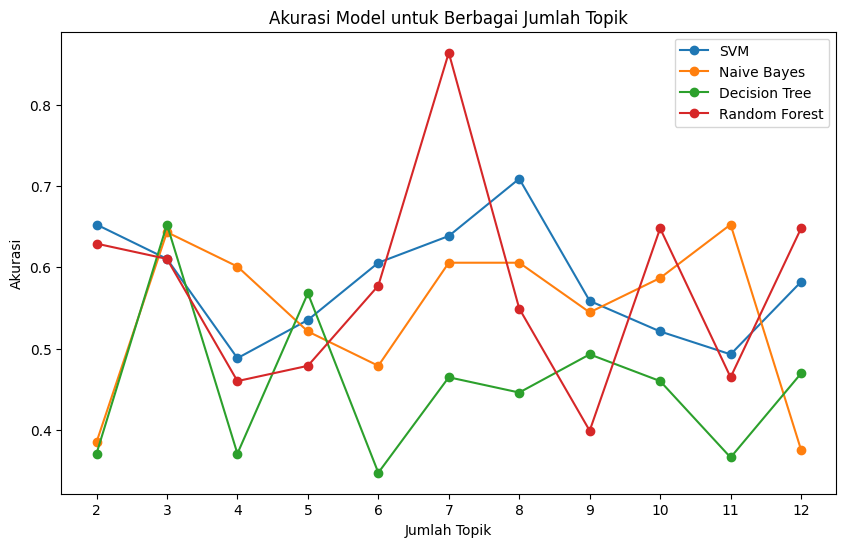

In [31]:
import matplotlib.pyplot as plt

# Pisahkan data berdasarkan model
svm_data = [entry for entry in results if entry['Model'] == 'SVM']
nb_data = [entry for entry in results if entry['Model'] == 'Naive Bayes']
dt_data = [entry for entry in results if entry['Model'] == 'Decission Tree']
rf_data = [entry for entry in results if entry['Model'] == 'Random Forest']

# Plotting
plt.figure(figsize=(10, 6))

# Plot akurasi untuk SVM
plt.plot([entry['Jumlah Topik'] for entry in svm_data], [entry['Accuracy'] for entry in svm_data], label='SVM', marker='o')
# Plot akurasi untuk model lainnya seperti Naive Bayes, Decision Tree, dan Random Forest
plt.plot([entry['Jumlah Topik'] for entry in nb_data], [entry['Accuracy'] for entry in nb_data], label='Naive Bayes', marker='o')
plt.plot([entry['Jumlah Topik'] for entry in dt_data], [entry['Accuracy'] for entry in dt_data], label='Decision Tree', marker='o')
plt.plot([entry['Jumlah Topik'] for entry in rf_data], [entry['Accuracy'] for entry in rf_data], label='Random Forest', marker='o')

# Menentukan nilai yang akan ditampilkan pada sumbu x
xticks = set([entry['Jumlah Topik'] for entry in results])
plt.xticks(list(xticks))

plt.xlabel('Jumlah Topik')
plt.ylabel('Akurasi')
plt.title('Akurasi Model untuk Berbagai Jumlah Topik')
plt.legend()
plt.show()

#### Dataframe history

In [32]:
df_history = pd.DataFrame(results)
df_history

,Model,Jumlah Topik,Alpha,Beta,Accuracy
0,Decission Tree,2,0.1,0.2,0.370892
1,Decission Tree,3,0.1,0.2,0.652582
2,Decission Tree,4,0.1,0.2,0.370892
3,Decission Tree,5,0.1,0.2,0.568075
4,Decission Tree,6,0.1,0.2,0.347418
5,Decission Tree,7,0.1,0.2,0.464789
6,Decission Tree,8,0.1,0.2,0.446009
7,Decission Tree,9,0.1,0.2,0.492958
8,Decission Tree,10,0.1,0.2,0.460094
9,Decission Tree,11,0.1,0.2,0.366197


In [53]:
df_history.to_csv("history.csv",index=False)

#### Best Akurasi

In [54]:
df_bestParam = pd.DataFrame([best_param])
df_bestParam.to_csv("best param.csv",index=False)
df_bestParam

,model_name,k,alpha,beta,accuracy,lda_Xtrain,lda_Xtest
0,Random Forest,7,0.1,0.2,0.86385,"[[0.01112851628456069, 0.9332627682094906, 0.0...","[[0.013337458079095853, 0.013332250332547039, ..."


#### Save model

In [34]:
save_model = best_model['model']
joblib.dump(save_model,"model.pkl")

save_lda = best_lda['lda']
joblib.dump(save_lda,"model lda.pkl")

['model lda.pkl']

#### Tampilan LDA

In [35]:
from joblib import load

model_lda = load("model lda.pkl")

In [36]:
k = best_param['k']
ev_Xtrain = best_param['lda_Xtrain']
ev_Xtest = best_param['lda_Xtest']

##### Proporsi topik dokumen

In [37]:
koloms = [f"Topik {i}" for i in range(1, k+1)]
dokumen = dataset['Berita']
proporsi_topik_dokumen = pd.DataFrame(ev_Xtrain, columns=koloms)
proporsi_topik_dokumen.insert(0,'Berita', dokumen)
proporsi_topik_dokumen.insert(len(proporsi_topik_dokumen.columns),'Kategori', dataset['Kategori'])
proporsi_topik_dokumen

,Berita,Topik 1,Topik 2,Topik 3,Topik 4,Topik 5,Topik 6,Topik 7,Kategori
0,Jakarta (ANTARA) - Berbagai peristiwa pol...,0.011129,0.933263,0.011120,0.011120,0.011120,0.011129,0.011121,politik
1,ANTARA - Ratusan warga ad...,0.011132,0.011131,0.011129,0.011129,0.011129,0.933219,0.011130,politik
2,ANTARA - Menghadiri HUT k...,0.009695,0.009694,0.009694,0.009694,0.009694,0.941836,0.009694,politik
3,"Karawang, Jawa Barat (ANTARA) - Calon wak...",0.010927,0.010925,0.010925,0.010925,0.010925,0.674229,0.271144,politik
4,ANTARA - Ketua Dewan Paka...,0.941486,0.009752,0.009751,0.009751,0.009751,0.009756,0.009752,politik
...,...,...,...,...,...,...,...,...,...
847,ANTARA - Pembalap dunia a...,0.007370,0.007370,0.007367,0.007367,0.007367,0.007372,0.955787,olahraga
848,ANTARA - Juara dunia dal...,0.011801,0.129246,0.011798,0.011798,0.011798,0.811758,0.011800,olahraga
849,Balige (ANTARA) - Pendiri H2O Nicolo Di S...,0.013442,0.795648,0.013436,0.013436,0.013436,0.137164,0.013438,olahraga
850,Jakarta (ANTARA) - Sebanyak 144 pegolf ya...,0.936249,0.010625,0.010624,0.010624,0.010624,0.010629,0.010624,olahraga


In [38]:
proporsi_topik_dokumen.to_csv("proporsi topik dokumen.csv",index=False)

##### Proporsi kata topik

In [50]:
# Output distribusi kata pada topik
proporsi_topik_kata = pd.DataFrame(model_lda.components_,columns=terms)
proporsi_topik_kata.insert(0, "Topik", koloms)
proporsi_topik_kata

,Topik,aac,aan,abad,abadi,abah,abai,abang,abbey,abd,...,zuhdiar,zuhri,zuldh,zulfikar,zulfikareditor,zulfikri,zulkifli,zumrotun,zur,zverev
0,Topik 1,0.2,0.200000,0.238902,0.290028,0.200000,0.248512,0.2,0.20000,0.200000,...,0.266724,0.200000,0.2,0.200000,0.200000,0.2,0.721768,0.223430,0.276535,0.2
1,Topik 2,0.2,0.200000,0.200000,0.239000,0.200000,0.200000,0.2,0.26157,0.336821,...,0.200000,0.200000,0.2,0.200000,0.200000,0.2,0.200000,0.200000,0.200000,0.2
2,Topik 3,0.2,0.200001,0.200000,0.200000,0.200000,0.200000,0.2,0.20000,0.200000,...,0.200000,0.200000,0.2,0.200000,0.200000,0.2,0.200000,0.200000,0.200000,0.2
3,Topik 4,0.2,0.200000,0.200000,0.200000,0.200000,0.200000,0.2,0.20000,0.200000,...,0.200000,0.200000,0.2,0.200000,0.200000,0.2,0.200000,0.200000,0.200000,0.2
4,Topik 5,0.2,0.216417,0.200000,0.200000,0.200000,0.200000,0.2,0.20000,0.200000,...,0.200000,0.200000,0.2,0.200000,0.200000,0.2,0.200000,0.200000,0.200000,0.2
5,Topik 6,0.2,0.259246,0.200000,0.370771,0.720902,0.200000,0.2,0.20000,0.200000,...,0.431186,0.638464,0.2,0.200000,0.377849,0.2,0.200000,0.264947,0.200000,0.2
6,Topik 7,0.2,0.200000,0.200000,0.200000,0.200000,0.200000,0.2,0.20000,0.200000,...,0.200000,0.200000,0.2,0.277061,0.200000,0.2,0.200000,0.220224,0.200000,0.2


In [51]:
proporsi_topik_kata.to_csv("proporsi topik kata.csv",index=False)

# Modeling

---

Berdasarkan pencarian model terbaik di atas maka akan digunakan model `SVM`, `k = 7`, `alpha = 0.1`, `beta = 0.2`, dan `LDA model` yang sudah disimpan untuk keperluan implementasi.

---

In [41]:
use_model_predict = load("model.pkl")

### Evaluation

In [55]:
# Melakukan prediksi pada data pengujian
y_pred = best_model['model'].predict(best_param['lda_Xtest'])

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

# Menampilkan laporan klasifikasi
print(f"Laporan Klasifikasi:")
print(classification_report(y_test, y_pred))

Akurasi: 0.863849765258216
Laporan Klasifikasi:
              precision    recall  f1-score   support

     ekonomi       0.87      0.85      0.86        78
    olahraga       0.88      0.87      0.87        68
     politik       0.84      0.88      0.86        67

    accuracy                           0.86       213
   macro avg       0.86      0.86      0.86       213
weighted avg       0.86      0.86      0.86       213



# Implementasi

In [56]:
datainp = ['Surabaya, Jatim (ANTARA) - Dinas Koperasi Usaha Kecil dan Menengah dan Perdagangan (Dinkopumdag) Kota Surabaya, Jawa Timur, menjaga stabilisasi harga bahan pangan menjelang Natal 2023 dan Tahun Baru 2024 dengan meluncurkan aplikasi Cek Harga Kulak Bahan Pokok atau Cak Bapok. Kepala Dinkopumdag Kota Surabaya Dewi Soeryowati dalam keterangannya di Surabaya, Jatim, Sabtu, mengatakan pedagang pasar dan toko kelontong merupakan kategori yang mendapatkan prioritas pada aplikasi Cak Bapok, lantaran acap kali terdampak kenaikan harga bahan pangan. "Nanti, muncul semua komoditas kebutuhan bahan pokok, sehingga pedagang mendapatkan pilihan informasi barang dan harga yang paling kompetitif," katanya. Saat ini, lanjut dia, sudah terdapat empat distributor besar yang bergabung di aplikasi Cak Bapok yakni Rumah Potong Hewan (RPH), Pasar Induk Sidotopo Surabaya (PISS), Badan Urusan Logistik (Bulog), dan Koperasi Bina Raharja. "Ini untuk memutus mata rantai yang terlalu banyak dari tangan ke tangan dan memastikan harganya lebih murah," ucapnya. Ke depannya, Dinkopumdag menggandeng distributor lainnya, salah satunya petani sayuran binaan Dinas Ketahanan Pangan dan Pertanian (DKPP) setempat, agar lebih banyak mewadahi kebutuhan pasar. Dewi menjelaskan aplikasi itu bisa dimanfaatkan pedagang dan pelaku usaha mikro, kecil, dan menengah (UMKM) untuk kulakan barang dagangan. Karena itu, Cak Bapok dirancang dengan konsep satu kali klik untuk memudahkan dalam proses pemesanan barang. Bahkan, di dalam aplikasi ini juga ada tools Indeks Kecukupan Pangan (IKP) di Kota Surabaya. "Kalai berbicara komoditas beras di aplikasi ini bisa tahu kebutuhan dan ketersediaannya hingga saat ini berapa, sehingga kami bisa bilang ketersediaan pangan beras di Surabaya aman, karena sudah punya data riil di dalam aplikasi itu," ujarnya. Sedangkan, pengiriman barangnya menggunakan jasa kurir yang berstatus sebagai warga miskin dan telah tercatat di data base milik Pemkot Surabaya. "Kami berharap dengan menjadi kurir di Cak Bapok mereka dapat menambah penghasilan lebih dan bahkan, kalau bisa lepas dari garis kemiskinan. Ini sejalan dengan program pemkot dalam rangka mengentas kemiskinan di Surabaya," tutur Dewi.Pewarta: Abdul Hakim/Ananto PradanaEditor: Kelik Dewanto COPYRIGHT © ANTARA 2023']
vectorizerInp = vectorizer.transform(datainp)

ldainp = model_lda.transform(vectorizerInp)
best_model['model'].predict(ldainp)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LatentDirichletAllocation was fitted with feature names
  warnings.warn(


array(['ekonomi'], dtype=object)

In [59]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.1
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.3.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.5.0
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.0
attrs                            23.1.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.13.1
backcall                         0.2.0
beautifulsoup4                   4.11.2
bidict                           0.22.1
b

In [3]:
import joblib
print(joblib.__version__)


1.3.2
